# Project

In [219]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 100

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.manifold import TSNE
from sklearn.model_selection import KFold


os.chdir('C:/Users/RH/Documents/GeekBrains/DataScience course/Numpy, Pandas, Sklearn/Project')

In [213]:
df_train = pd.read_csv('train.csv', sep = ',', encoding = 'utf8')
df_test = pd.read_csv('test.csv', sep = ',', encoding = 'utf8')

df_train = df_train.rename(columns={"Helthcare_2": "Healthcare_2"}) #исправляем орфографическую ошибку
df_test = df_test.rename(columns={"Helthcare_2": "Healthcare_2"}) #исправляем орфографическую ошибку

#df_train['HouseYear'].sort_values(ascending=False)
df_train['HouseYear'].replace({20052011: 2005, 4968: 1968}, inplace=True) #заменяем нереалистичные данные

#заменяем буквы на цифры в категориальных переменных
df_train['Ecology_2'].replace({'A': 0, 'B': 1}, inplace=True)
df_train['Ecology_3'].replace({'A': 0, 'B': 1}, inplace=True)
df_train['Shops_2'].replace({'A': 0, 'B': 1}, inplace=True)

df_test['Ecology_2'].replace({'A': 0, 'B': 1}, inplace=True)
df_test['Ecology_3'].replace({'A': 0, 'B': 1}, inplace=True)
df_test['Shops_2'].replace({'A': 0, 'B': 1}, inplace=True)

#удаляем кривые данные и заменяем нереалистичные по площади кухни
df_train = df_train.drop(df_train[df_train['KitchenSquare'] >= 1000].index)
df_train = df_train.drop(df_train[df_train['LifeSquare'] >= 4000].index)
df_test['KitchenSquare'] = np.where(df_test['KitchenSquare'] >= 200, np.median(df_test['KitchenSquare']) , df_test['KitchenSquare'])


In [214]:
class EDA:
        
    def __init__(self, df):
        self.df = df
    
    def shape(self):
        return self.df.shape
    
    def nan(self):
        return self.df.isna().sum()

    def types(self):
        return self.df.dtypes
    
    def describe(self):
        return self.df.describe().T
    

eda_train = EDA(df_train)
eda_test = EDA(df_test)

In [215]:
print('train shape : \n {} \n'.format(eda_train.shape()))
print('train nan stat : \n {} \n'.format(eda_train.nan()))
print('train data types : \n {} \n'.format(eda_train.types()))
print('train describe : \n {} \n'.format(eda_train.describe()))

train shape : 
 (9997, 20) 

train nan stat : 
 Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4796
Healthcare_2        0
Shops_1             0
Shops_2             0
Price               0
dtype: int64 

train data types : 
 Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2          int64
Ecology_3          int64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Healthcare_2       int64
Shops_1            int64
Shops_2            int64
P

In [216]:
print('test shape : \n {} \n'.format(eda_test.shape()))
print('test nan stat : \n {} \n'.format(eda_test.nan()))
print('test data types : \n {} \n'.format(eda_test.types()))
print('test describe : \n {} \n'.format(eda_test.describe()))

test shape : 
 (5000, 19) 

test nan stat : 
 Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Healthcare_2        0
Shops_1             0
Shops_2             0
dtype: int64 

test data types : 
 Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2          int64
Ecology_3          int64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Healthcare_2       int64
Shops_1            int64
Shops_2            int64
dtype: object 

test descr

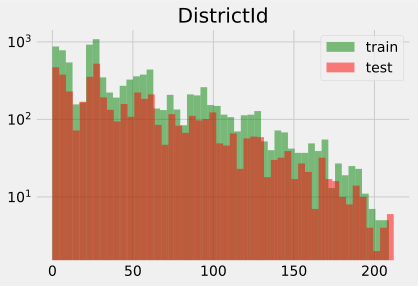

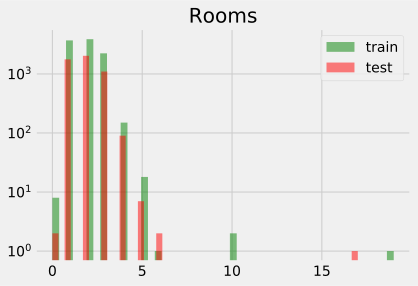

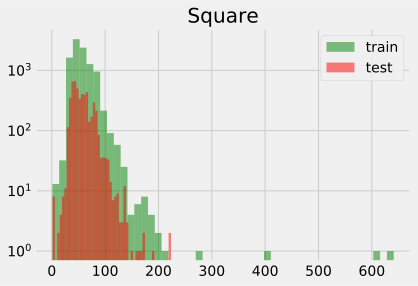

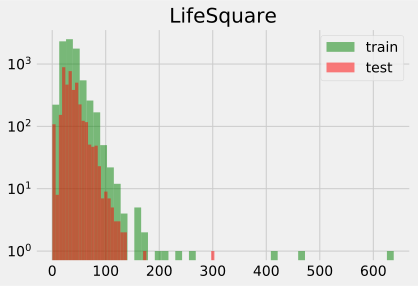

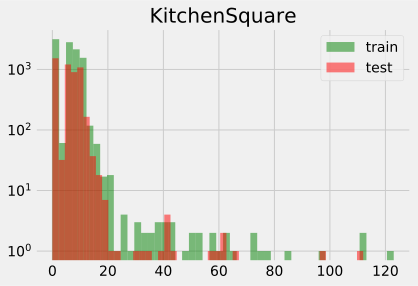

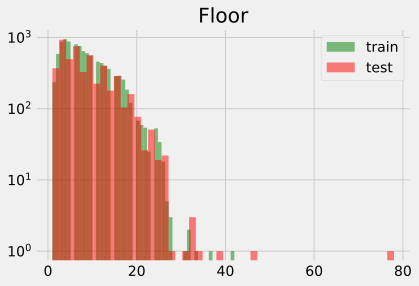

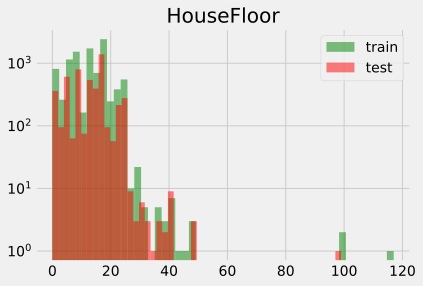

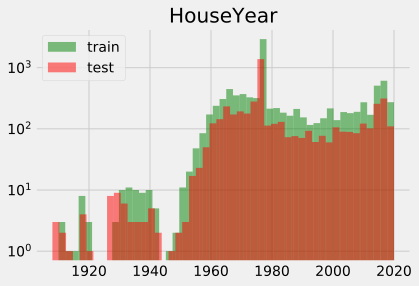

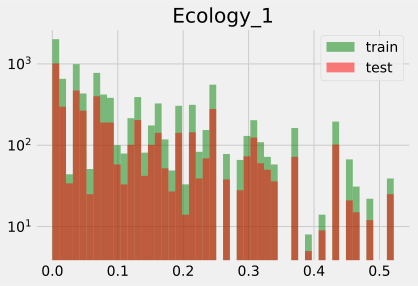

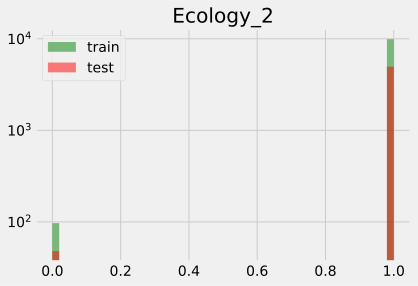

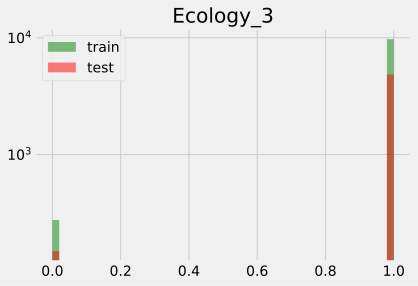

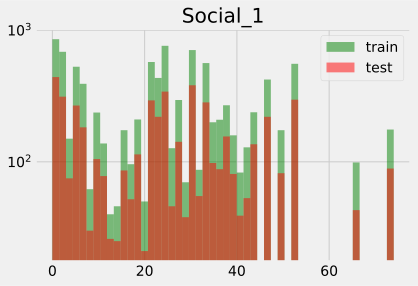

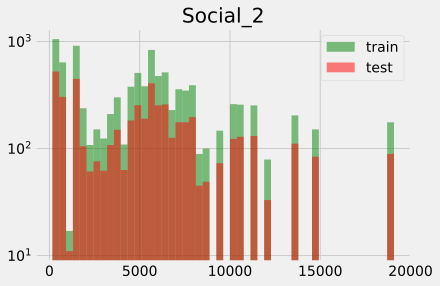

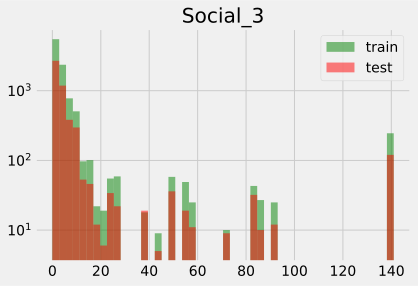

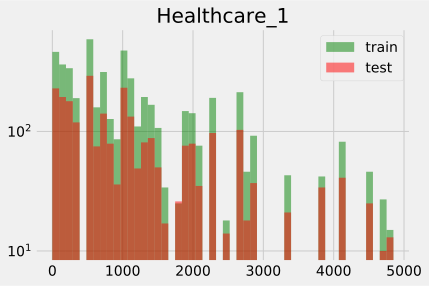

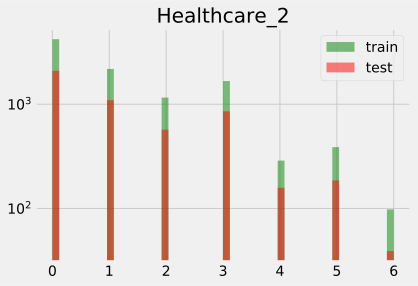

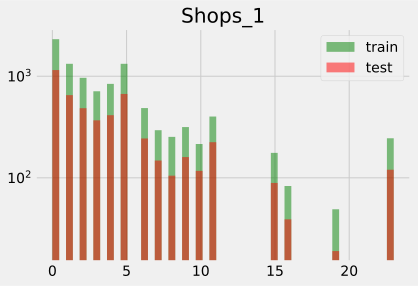

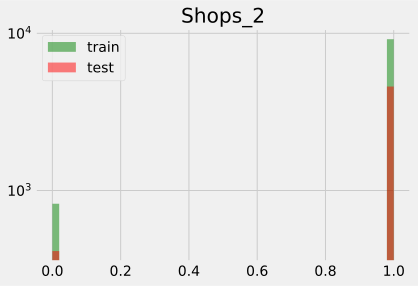

In [217]:
def compare(feature):

    plt.hist(df_train[feature], bins=50, alpha  = 0.5, color = 'green', label='train')
    plt.hist(df_test[feature], bins=50, alpha  = 0.5, color = 'red', label='test')
    plt.title(feature)
    plt.legend()
    plt.yscale('log')
    plt.show()

for i in range(1, len(df_test.columns)):
    compare(df_test.columns[i])

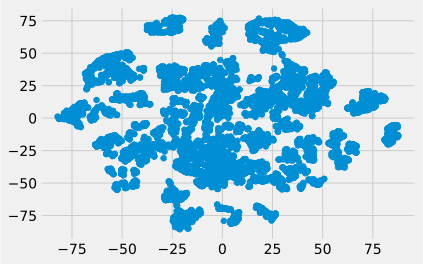

In [173]:
target = ['Price']
# , 'Shops_2' 'Ecology_2', 'Ecology_3',
features = ['Square', 'Floor', 'Rooms', 'HouseYear', 'Ecology_1',  'Social_1', 'Social_2', 'Social_2', 
         'Healthcare_2', 'Shops_1']

x_sc = scaler.fit(df_train[features].values)
x_train_sc = x_sc.transform(df_train[features].values)

tsne = TSNE(n_components=2, perplexity = 45, learning_rate=150, random_state=100)
x_train_tsne = tsne.fit_transform(x_train_sc)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])
plt.show()

In [218]:


"""
#df_train['Ecology_2'] = df_train['Ecology_2'].astype('category')
#df_train['Ecology_3'] = df_train['Ecology_3'].astype('category')
#df_train['Shops_2'] = df_train['Shops_2'].astype('category')


category = ['Ecology_2', 'Ecology_3', 'Shops_2']


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

x_ohe = ohe.fit(df_train[category])
x_ohe.categories_
x_ohe.get_feature_names(['Ecology_2', 'Ecology_3', 'Shops_2'])
x_train_ohe = x_ohe.transform(df_train[category]).toarray() 

#concatenated_data = pd.concat([df_train, x_train_ohe], axis=1)
x_train_ohe = pd.DataFrame(x_train_ohe, index=df_train.index, 
                           columns = x_ohe.get_feature_names(['Ecology_2', 'Ecology_3', 'Shops_2']))
x_train_ohe.head(5)
"""


"\n#df_train['Ecology_2'] = df_train['Ecology_2'].astype('category')\n#df_train['Ecology_3'] = df_train['Ecology_3'].astype('category')\n#df_train['Shops_2'] = df_train['Shops_2'].astype('category')\n\n\ncategory = ['Ecology_2', 'Ecology_3', 'Shops_2']\n\n\nfrom sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder()\n\nx_ohe = ohe.fit(df_train[category])\nx_ohe.categories_\nx_ohe.get_feature_names(['Ecology_2', 'Ecology_3', 'Shops_2'])\nx_train_ohe = x_ohe.transform(df_train[category]).toarray() \n\n#concatenated_data = pd.concat([df_train, x_train_ohe], axis=1)\nx_train_ohe = pd.DataFrame(x_train_ohe, index=df_train.index, \n                           columns = x_ohe.get_feature_names(['Ecology_2', 'Ecology_3', 'Shops_2']))\nx_train_ohe.head(5)\n"

In [220]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

target = 'Price'
# , 'Shops_2' 'Ecology_2', 'Ecology_3',
features = ['Square', 'Floor', 'Rooms', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_2', 
         'Healthcare_2', 'Shops_1', 'Shops_2']

y = df_train[target].values.ravel()
x = df_train[features].values

param_grid  = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_split':[2],
                'min_samples_leaf':[1]}

rf = RandomForestRegressor(n_estimators= 100,
                             criterion='mse',                           
                             min_weight_fraction_leaf=0.0,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             bootstrap=True,
                             oob_score=False,
                             random_state=None,
                             verbose=0,
                             warm_start=False)

grid = GridSearchCV(rf, param_grid = param_grid, cv = 10, 
                    scoring = 'r2') 

grid.fit(x, y)

print(grid.best_estimator_)

print(grid.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.6890116318265036


In [222]:
model = grid.best_estimator_.fit(x, y)
feach_import = np.vstack((features, np.round(model.feature_importances_,2))).T
feach_import

array([['Square', '0.47'],
       ['Floor', '0.02'],
       ['Rooms', '0.1'],
       ['HouseYear', '0.05'],
       ['Ecology_1', '0.05'],
       ['Ecology_2', '0.0'],
       ['Ecology_3', '0.0'],
       ['Social_1', '0.13'],
       ['Social_2', '0.07'],
       ['Social_2', '0.07'],
       ['Healthcare_2', '0.01'],
       ['Shops_1', '0.03'],
       ['Shops_2', '0.0']], dtype='<U32')

Прогноз

In [225]:
x_test = df_test[features].values
y_test = np.round(model.predict(x_test),1)

In [227]:
output = np.vstack([df_test['Id'].values, y_test]).T

output = pd.DataFrame(output)
output.columns = ['Id', 'Price']
output['Id'] = pd.to_numeric(output['Id'], downcast='integer')

output.to_csv('output.csv', index=False, sep= ',')

In [229]:
output.head()

,Id,Price
0,725,161861.3
1,15856,168843.8
2,5480,113606.6
3,15664,381444.5
4,14275,137357.0
